#**Machine Learning - Online Hackathon Code Gladiators 2021**
# Team Name: ***ML srkr***
# Team Member:

*   **Varigonda Sai Nirmal Vignu(Team Leader)**
*   **Uday Sandeep** 



# Conversion fraud in Digital Advertising
**Digital Advertising is changing at a rapid pace with a huge increase in digital audience. At the same time, the digital advertising success metric is shifting from audience volume (eg. Impression count) to conversions (eg. lead submissions) as the success metric. This requires higher transparency and control on the conversions.**

**Colombia, the digital advertising arm of Times Internet Limited has seen significant growth in its digital advertising inventory. It wants to ensure that in all its conversion-based campaigns, no unfair advantage is given to the publishers generating fake leads.**



# **Task:**
**Add conversion_fraud column as True for marking a conversion entry as fraud.**

# **Essential Columns:**
client id: Advertiser ID


pubclient id: Publisher ID

clickIp: IP Address

clmbuser id : unique user id

impr id: Unique Key for every served impression

site id: Publisher wesite

goal id: Conversion`s goal type identification id

City id / State id / CountryDim id: Geo Details

browser id: browser used for accessing publisher on any device on web.


adslot id: slot id where advertisement is displayed on any site (unqiue for all sites)

crtd: timestamp of the action

itmclmb id: Image/Creative shown

ispDimId: Internet Service Provider

devTypeDimId: Device Id

osVerDimId: OS Version

#Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading data from Training Data .csv file

In [4]:
train_df=pd.read_csv('Training Data.csv')
train_df

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,deviceId_cr,uvh_cr,uv_cr,platformId_cr,sdkVersion_cr,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...",16,196058.0,129639.0,436.0,1806.0,202038.0,2,264496,280429.0,144.0,10,2332.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348022.0,NaN,NaN,NaN,NaN,NaN,333495,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,5488773,49504157,1.0,15240,https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...,178,663.0,6384,1.620000e+12,2,1.0,"h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...",16,196058.0,129639.0,10314.0,1817.0,202038.0,2,264496,136127.0,144.0,10,3201.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348024.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,5488088,49504160,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4144.0,6384,1.620000e+12,2,1.0,"7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...",16,196058.0,129639.0,0.0,1812.0,202038.0,2,264503,172725.0,144.0,10,2821.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348027.0,NaN,NaN,NaN,NaN,NaN,128491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,5488088,49504155,1.0,2320,https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...,34,4140.0,6384,1.620000e+12,2,1.0,"p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...",16,196058.0,129639.0,10300.0,1815.0,202038.0,2,264496,136127.0,144.0,10,3144.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,348023.0,NaN,NaN,NaN,NaN,NaN,"232,809,333,496",348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1.0,1,NaN,3296,NaN,3370,1.620000e+12,2,1.0,"761,75y",17,129311.0,129408.0,0.0,1818.0,0.0,2,264496,136127.0,144.0,10,42597.0,1.620000e+12,1.620000e+12,360833.0,1.0,348011.0,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2139,41d7dab3-0ab7-4039-a936-2ceab9dbcbf7,1.620000e+12,a9371035-94c0-49a9-b807-70e472bb31a9-1sk24,321114,18.0,"8go,8gr,8k6,8h4,8gv,2vk,8gw,8iy,3si,2x6,nqv,2v...",2.000000,144,XXX.XXX.XXX.XXX,5610343,53184745,1.0,16153,http%3A%2F%2Fnavbharattimes.indiatimes.com%2F,1043,4166.0,722,1.620000e+12,2,1.0,"7dm,jyq,8h4,k1m,nyw,lo4,nqv,o1w,o1v,apc,o1y,o1...",6,129311.0,129433.0,10255.0,1804.0,0.0,2,264494,0.0,144.0,10,159424.0,1.620000e+12,1.620000e+12,360956.0,1.0,348011.0,348027.

In [5]:
train_df.columns

Index(['clientid_cr', 'clmbuserid_cr', 'conversiontime_cr', 'imprid_cr',
       'adslotdimid_cr', 'algo_cr', 'audiences_cr', 'clickbid_cr',
       'geodimid_cr', 'ip_cr', 'itemcolumbiaid_cr', 'itemid_cr', 'position_cr',
       'pubclientid_cr', 'refurl_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'time_cr', 'adLogType_cr', 'v_cr', 'allAudiences_cr',
       'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'modelDimId_cr', 'lookUpFrom_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'goalTypeId_cr', 'conversionDurationInMillis_cr',
       'impressionTimeInMillis_cr', 'clickTimeInMillis_cr', 'osVerDimId_cr',
       'uuidSource_cr', 'geoGrpDimId_cr', 'stateGrpDimId_cr', 'deviceId_cr',
       'uvh_cr', 'uv_cr', 'platformId_cr', 'sdkVersion_cr', 'usrClusterId_cr',
       'cityGrpDimId_cr', 'siteClusterIds_cr', 'refClusterId_cr', 'paid_cr',
       'spend_cr', 'attributionType_cr', 'conversionid_cr', 'optimize_on_cr',
       'bundleId_cr

In [6]:
train_df.shape

(965, 56)

#Removing unwanted columns

In [7]:
train_df1=pd.DataFrame(data=train_df,columns=['clientid_cr','pubclientid_cr','ip_cr','clmbuserid_cr','imprid_cr','siteId_cr','goalTypeId_cr','cityId_cr','stateId_cr','countryDimId_cr','browserId_cr','adslotdimid_cr','time_cr','itemcolumbiaid_cr','ispDimId_cr','deviceId_cr','osVerDimId_cr'])

In [8]:
train_df1

,clientid_cr,pubclientid_cr,ip_cr,clmbuserid_cr,imprid_cr,siteId_cr,goalTypeId_cr,cityId_cr,stateId_cr,countryDimId_cr,browserId_cr,adslotdimid_cr,time_cr,itemcolumbiaid_cr,ispDimId_cr,deviceId_cr,osVerDimId_cr
0,75694,2320,XXX.XXX.XXX.XXX,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,01649076-c77f-4d70-afc8-213535427147-1sjd4,34,10,436.0,1806.0,144.0,129639.0,321300,1.620000e+12,5488088,280429.0,NaN,199452.0
1,75694,15240,XXX.XXX.XXX.XXX,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,178,10,10314.0,1817.0,144.0,129639.0,129239,1.620000e+12,5488773,136127.0,NaN,199452.0
2,75694,2320,XXX.XXX.XXX.XXX,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,34,10,0.0,1812.0,144.0,129639.0,321554,1.620000e+12,5488088,172725.0,NaN,199452.0
3,75694,2320,XXX.XXX.XXX.XXX,f79f3de7-5edb-4319-9549-117f47996066-10wrk,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,34,10,10300.0,1815.0,144.0,129639.0,321300,1.620000e+12,5488088,136127.0,NaN,199452.0
4,30431,1,XXX.XXX.XXX.XXX,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,3296,10,0.0,1818.0,144.0,129408.0,355768,1.620000e+12,5614054,136127.0,NaN,360833.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2139,16153,XXX.XXX.XXX.XXX,41d7dab3-0ab7-4039-a936-2ceab9dbcbf7,a9371035-94c0-49a9-b807-70e472bb31a9-1sk24,1043,10,10255.0,1804.0,144.0,129433.0,321114,1.620000e+12,5610343,0.0,NaN,360956.0
961,70491,76969,XXX.XXX.XXX.XXX,39511cf3-0358-4ae9-9fec-fe3a74e98a13,a955a5eb-1f0f-4654-8381-9f709bb98a7a-10ni8,2923,10,10257.0,1805.0,144.0,129433.0,334758,1.620000e+12,5584022,280429.0,NaN,359919.0
962,85572,15336,XXX.XXX.XXX.XXX,e5d4037f-ec67-4d7b-8d83-9012ee7d64b9-1sjac,a97061e8-4863-440a-956c-14c85984c29e-10nw4,379,10,0.0,1799.0,144.0,129639.0,348089,1.620000e+12,5599296,136127.0,NaN,199522.0
963,75694,85030,XXX.XXX.XXX.XXX,c7491247-f203-48df-b08d-d25d0d873e20-1sjwk,a974732d-bfa0-4018-b216-b2d1c97f3337-1sj7k,3290,10,34725.0,1807.0,144.0,129639.0,356952,1.620000e+12,5488773,0.0,NaN,199414.0


In [9]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   clientid_cr        965 non-null    int64  
 1   pubclientid_cr     965 non-null    int64  
 2   ip_cr              945 non-null    object 
 3   clmbuserid_cr      965 non-null    object 
 4   imprid_cr          965 non-null    object 
 5   siteId_cr          965 non-null    int64  
 6   goalTypeId_cr      965 non-null    int64  
 7   cityId_cr          945 non-null    float64
 8   stateId_cr         945 non-null    float64
 9   countryDimId_cr    945 non-null    float64
 10  browserId_cr       944 non-null    float64
 11  adslotdimid_cr     965 non-null    int64  
 12  time_cr            965 non-null    float64
 13  itemcolumbiaid_cr  965 non-null    int64  
 14  ispDimId_cr        945 non-null    float64
 15  deviceId_cr        111 non-null    float64
 16  osVerDimId_cr      944 non

In [10]:
train_df1=train_df1.drop(['deviceId_cr','ip_cr'],axis=1)

Here we are removing **devideId_cr** and **ip_cr** because in the given data we can observe that there are more null value for deviceId_cr and all values are equal for ip_cr

# EDA

In [11]:
train_df1.head()

,clientid_cr,pubclientid_cr,clmbuserid_cr,imprid_cr,siteId_cr,goalTypeId_cr,cityId_cr,stateId_cr,countryDimId_cr,browserId_cr,adslotdimid_cr,time_cr,itemcolumbiaid_cr,ispDimId_cr,osVerDimId_cr
0,75694,2320,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,01649076-c77f-4d70-afc8-213535427147-1sjd4,34,10,436.0,1806.0,144.0,129639.0,321300,1.620000e+12,5488088,280429.0,199452.0
1,75694,15240,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,178,10,10314.0,1817.0,144.0,129639.0,129239,1.620000e+12,5488773,136127.0,199452.0
2,75694,2320,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,34,10,0.0,1812.0,144.0,129639.0,321554,1.620000e+12,5488088,172725.0,199452.0
3,75694,2320,f79f3de7-5edb-4319-9549-117f47996066-10wrk,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,34,10,10300.0,1815.0,144.0,129639.0,321300,1.620000e+12,5488088,136127.0,199452.0
4,30431,1,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,3296,10,0.0,1818.0,144.0,129408.0,355768,1.620000e+12,5614054,136127.0,360833.0


# Checking and Updation of null/NAN values

In [12]:
df=train_df1[train_df1['cityId_cr']!=0]

In [13]:
m1=df['cityId_cr'].mode()
m1


0    435.0
dtype: float64

In [14]:
train_df1['cityId_cr'].fillna(435.0,inplace=True)

In [15]:
df1=train_df1[train_df1['stateId_cr']!=0]
m2=df['stateId_cr'].mode()
m2

0    1808.0
dtype: float64

In [16]:
train_df1['stateId_cr'].fillna(1808.0,inplace=True)

In [17]:
df2=train_df1[train_df1['countryDimId_cr']!=0]
m3=df['countryDimId_cr'].mode()
m3

0    144.0
dtype: float64

In [18]:
train_df1['countryDimId_cr'].fillna(144.0,inplace=True)

In [19]:
train_df1['cityId_cr'].unique()

array([   436.,  10314.,      0.,  10300.,    439.,  34703.,    440.,
        10278.,    438.,  10240.,    435., 347087.,   4845.,    437.,
         2942.,  10282.,  34708.,  10276.,  10254.,  10255.,  34714.,
        10286.,  10310.,  10269.,  34755.,  10291.,  10233.,  10239.,
        10295., 208118.,  10313.,  10256.,  34699., 322890.,  10315.,
        34679.,  34725.,  34724.,  10284.,  10238.,  10290.,  10231.,
        10250., 322888., 322893.,  34688.,  10292.,  10243.,  34705.,
        10263.,  34728.,  34720.,  10267.,  10234., 208114.,  34719.,
        10316.,  10309.,   4829.,  10251.,  10302.,  34698.,  34681.,
        10308., 333484.,  34727.,  17741.,  10262.,  10279.,  16713.,
        10232.,  10285.,  10287.,  34702.,   9376.,  10235.,  10289.,
        34726.,  10261.,  34685.,  17805.,  10257.])

#Replacing 0. with respected metrics

In [20]:
train_df1['cityId_cr'] = train_df1['cityId_cr'].replace([0.],435.0)

In [21]:
train_df1['cityId_cr'].unique()

array([   436.,  10314.,    435.,  10300.,    439.,  34703.,    440.,
        10278.,    438.,  10240., 347087.,   4845.,    437.,   2942.,
        10282.,  34708.,  10276.,  10254.,  10255.,  34714.,  10286.,
        10310.,  10269.,  34755.,  10291.,  10233.,  10239.,  10295.,
       208118.,  10313.,  10256.,  34699., 322890.,  10315.,  34679.,
        34725.,  34724.,  10284.,  10238.,  10290.,  10231.,  10250.,
       322888., 322893.,  34688.,  10292.,  10243.,  34705.,  10263.,
        34728.,  34720.,  10267.,  10234., 208114.,  34719.,  10316.,
        10309.,   4829.,  10251.,  10302.,  34698.,  34681.,  10308.,
       333484.,  34727.,  17741.,  10262.,  10279.,  16713.,  10232.,
        10285.,  10287.,  34702.,   9376.,  10235.,  10289.,  34726.,
        10261.,  34685.,  17805.,  10257.])

In [22]:
train_df1['stateId_cr'].unique()

array([  1806.,   1817.,   1812.,   1815.,   1818.,   2571.,   2442.,
         2437.,   1802.,   1808.,      0., 129163.,   1504.,   2576.,
         2929.,   1810.,   2424.,   2420.,   2570.,   1807.,   1803.,
         1804.,   1799.,   2428.,   2578.,   1801.,   1814.,   1811.,
         1434., 341146.,   2572.,   2518.,   1800.,   2401.,   1809.,
         2580.,   2431.,   2432.,   2577.,   1816.,   2407.,   1805.,
         2440.,   2406.,   2419.])

In [23]:
train_df1['stateId_cr'] = train_df1['stateId_cr'].replace([0.],1808.0)

In [24]:
train_df1['stateId_cr'].unique()

array([  1806.,   1817.,   1812.,   1815.,   1818.,   2571.,   2442.,
         2437.,   1802.,   1808., 129163.,   1504.,   2576.,   2929.,
         1810.,   2424.,   2420.,   2570.,   1807.,   1803.,   1804.,
         1799.,   2428.,   2578.,   1801.,   1814.,   1811.,   1434.,
       341146.,   2572.,   2518.,   1800.,   2401.,   1809.,   2580.,
         2431.,   2432.,   2577.,   1816.,   2407.,   1805.,   2440.,
         2406.,   2419.])

In [25]:
train_df1['countryDimId_cr'].unique()

array([144., 145., 149., 433., 406., 434., 426., 425., 423.])

In [26]:
df5=train_df1[train_df1['browserId_cr']!=0]
m5=df['browserId_cr'].mode()
m5

0    129639.0
dtype: float64

In [27]:
train_df1['browserId_cr'].fillna(129639.0,inplace=True)

In [28]:
train_df1['browserId_cr'].unique()


array([129639., 129408.,      0., 129467., 196034., 196030., 129433.,
       129473., 129771., 129641.])

In [29]:
train_df1['browserId_cr'] = train_df1['browserId_cr'].replace([0.],129639.0)

In [30]:
train_df1['browserId_cr'].unique()


array([129639., 129408., 129467., 196034., 196030., 129433., 129473.,
       129771., 129641.])

In [31]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   clientid_cr        965 non-null    int64  
 1   pubclientid_cr     965 non-null    int64  
 2   clmbuserid_cr      965 non-null    object 
 3   imprid_cr          965 non-null    object 
 4   siteId_cr          965 non-null    int64  
 5   goalTypeId_cr      965 non-null    int64  
 6   cityId_cr          965 non-null    float64
 7   stateId_cr         965 non-null    float64
 8   countryDimId_cr    965 non-null    float64
 9   browserId_cr       965 non-null    float64
 10  adslotdimid_cr     965 non-null    int64  
 11  time_cr            965 non-null    float64
 12  itemcolumbiaid_cr  965 non-null    int64  
 13  ispDimId_cr        945 non-null    float64
 14  osVerDimId_cr      944 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 113.2+ KB


In [32]:
df5=train_df1[train_df1['ispDimId_cr']!=0]
m5=df['ispDimId_cr'].mode()
m5

0    280429.0
dtype: float64

In [33]:
train_df1['ispDimId_cr'].fillna(280429.0,inplace=True)

In [34]:
train_df1['ispDimId_cr'].unique()

array([280429., 136127., 172725., 150208., 265618., 150733., 132991.,
       164681., 278940., 151530., 266737., 133765., 147570., 135885.,
       177151., 154900., 146453., 151879., 139145., 185265., 149033.,
       143124.,      0., 156196., 266906., 266031., 146142., 282855.,
       273302., 266913., 177700., 272343., 184911., 162352., 268021.,
       165658., 186936., 166358., 134237., 170706., 162894., 163485.,
       281745., 161223., 153317., 136528., 285819., 189415., 265493.,
       280693., 183263., 277934., 180916., 180305., 165748., 266271.,
       148498., 266257., 269937., 147958., 190212., 285749., 172542.,
       285107., 187725., 151402., 265611., 180933., 280043., 165128.,
       274729., 281560., 180303., 267285., 148496., 145456., 267504.,
       149453., 178145., 282895., 178143., 284796., 155404., 140092.,
       281987., 149468., 264684., 265203., 281885., 190004., 157825.,
       278926., 165550., 150230., 152418., 187798., 189497., 134335.,
       150210., 2861

In [35]:
train_df1['ispDimId_cr'] = train_df1['ispDimId_cr'].replace([0.],280429.0)

In [36]:
train_df1['ispDimId_cr'].unique()

array([280429., 136127., 172725., 150208., 265618., 150733., 132991.,
       164681., 278940., 151530., 266737., 133765., 147570., 135885.,
       177151., 154900., 146453., 151879., 139145., 185265., 149033.,
       143124., 156196., 266906., 266031., 146142., 282855., 273302.,
       266913., 177700., 272343., 184911., 162352., 268021., 165658.,
       186936., 166358., 134237., 170706., 162894., 163485., 281745.,
       161223., 153317., 136528., 285819., 189415., 265493., 280693.,
       183263., 277934., 180916., 180305., 165748., 266271., 148498.,
       266257., 269937., 147958., 190212., 285749., 172542., 285107.,
       187725., 151402., 265611., 180933., 280043., 165128., 274729.,
       281560., 180303., 267285., 148496., 145456., 267504., 149453.,
       178145., 282895., 178143., 284796., 155404., 140092., 281987.,
       149468., 264684., 265203., 281885., 190004., 157825., 278926.,
       165550., 150230., 152418., 187798., 189497., 134335., 150210.,
       286194., 1561

In [37]:
df5=train_df1[train_df1['osVerDimId_cr']!=0]
m5=df['osVerDimId_cr'].mode()
m5

0    199452.0
dtype: float64

In [38]:
train_df1['osVerDimId_cr'].fillna(199452.0,inplace=True)

In [39]:
train_df1['osVerDimId_cr'].unique()

array([199452., 360833., 199414.,      0., 360140., 199522., 359528.,
       361287., 360831., 199505., 359921., 359919., 360956., 206071.,
       360155., 361320., 360145., 199625., 360788., 206070., 360143.,
       360147., 360138., 206064., 360751., 360234., 361447., 360765.,
       361301., 360849., 361329., 199586.])

In [40]:
train_df1['osVerDimId_cr'] = train_df1['osVerDimId_cr'].replace([0.],199452.0)

In [41]:
train_df1['osVerDimId_cr'].unique()

array([199452., 360833., 199414., 360140., 199522., 359528., 361287.,
       360831., 199505., 359921., 359919., 360956., 206071., 360155.,
       361320., 360145., 199625., 360788., 206070., 360143., 360147.,
       360138., 206064., 360751., 360234., 361447., 360765., 361301.,
       360849., 361329., 199586.])

In [42]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   clientid_cr        965 non-null    int64  
 1   pubclientid_cr     965 non-null    int64  
 2   clmbuserid_cr      965 non-null    object 
 3   imprid_cr          965 non-null    object 
 4   siteId_cr          965 non-null    int64  
 5   goalTypeId_cr      965 non-null    int64  
 6   cityId_cr          965 non-null    float64
 7   stateId_cr         965 non-null    float64
 8   countryDimId_cr    965 non-null    float64
 9   browserId_cr       965 non-null    float64
 10  adslotdimid_cr     965 non-null    int64  
 11  time_cr            965 non-null    float64
 12  itemcolumbiaid_cr  965 non-null    int64  
 13  ispDimId_cr        965 non-null    float64
 14  osVerDimId_cr      965 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 113.2+ KB


In [43]:
train_df1.isna().sum()

clientid_cr          0
pubclientid_cr       0
clmbuserid_cr        0
imprid_cr            0
siteId_cr            0
goalTypeId_cr        0
cityId_cr            0
stateId_cr           0
countryDimId_cr      0
browserId_cr         0
adslotdimid_cr       0
time_cr              0
itemcolumbiaid_cr    0
ispDimId_cr          0
osVerDimId_cr        0
dtype: int64

In [44]:
for i in train_df1.columns:
  if 0. in train_df1[i].unique():
    print(i)
  


In [45]:
Y=train_df['conversion_fraud']

In [46]:
Y.isna().sum()

0

In [47]:
Y.unique()

array([ True, False])

In [48]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   clientid_cr        965 non-null    int64  
 1   pubclientid_cr     965 non-null    int64  
 2   clmbuserid_cr      965 non-null    object 
 3   imprid_cr          965 non-null    object 
 4   siteId_cr          965 non-null    int64  
 5   goalTypeId_cr      965 non-null    int64  
 6   cityId_cr          965 non-null    float64
 7   stateId_cr         965 non-null    float64
 8   countryDimId_cr    965 non-null    float64
 9   browserId_cr       965 non-null    float64
 10  adslotdimid_cr     965 non-null    int64  
 11  time_cr            965 non-null    float64
 12  itemcolumbiaid_cr  965 non-null    int64  
 13  ispDimId_cr        965 non-null    float64
 14  osVerDimId_cr      965 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 113.2+ KB


In [49]:
train_df1['clmbuserid_cr'].unique().size

896

#Encoding the non-numeric data

In [50]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_df1['clmbuserid_cr']= label_encoder.fit_transform(train_df1['clmbuserid_cr'])
  
train_df1['clmbuserid_cr'].unique()

array([192, 288, 744, 872,   9,  70, 384, 331, 142, 719, 283, 216, 699,
       340, 124, 306, 856, 756, 859, 716, 658, 659, 504, 568, 274, 501,
       769, 346, 200, 628, 381, 841, 229,  55,  59, 779, 712, 131, 815,
       239, 845, 529, 143, 434, 836, 517, 787, 652, 187, 440, 316,  97,
       564, 729, 645, 807, 541, 596, 405, 358, 115, 296, 513, 733, 361,
       432, 773, 635, 207, 825, 447,  15, 245, 598, 500, 424, 766, 312,
       644, 755, 714, 465, 689,  33, 629,   5, 495, 267, 403, 550, 567,
       591, 693, 490, 821, 593, 225, 416, 617, 790, 174, 682, 391, 868,
        48, 708, 688, 808, 630, 609, 146, 210, 483, 663, 843, 377, 620,
       180, 149, 608,  38, 533, 355,  91, 118, 242, 326, 418, 172, 614,
       694,  16, 679, 894, 534, 169, 548, 739, 528,  87, 828, 311, 382,
       881, 810, 864, 413, 765, 840, 723,  58, 892, 578, 293, 227, 427,
       217, 565, 816,  68, 527, 834, 623, 291, 219, 667, 469, 269, 530,
       595, 583, 388, 539, 706, 325, 170, 670, 433, 880, 160,  7

In [51]:
train_df1['imprid_cr'].unique().size

934

In [52]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_df1['imprid_cr']= label_encoder.fit_transform(train_df1['imprid_cr'])
  
train_df1['imprid_cr'].unique()

array([  8, 933,  26,  48,  60,  73, 932, 931, 930,  83, 929, 928, 211,
        92,  97, 927, 292, 113, 115, 126, 129, 138, 924, 167, 923, 203,
       379, 298, 921, 920, 919, 918, 355, 359, 916, 472, 915, 914, 892,
       925, 913, 912, 401, 811, 907, 904, 388, 503, 898, 897, 537, 887,
       896, 895, 547, 894, 890, 891, 563, 888, 885, 572, 108, 633, 590,
       603, 884, 627, 651, 655, 699, 883, 881, 727, 773, 797, 841, 880,
       864, 829, 868, 882, 863, 886, 889, 893, 853, 845, 824, 808, 899,
       794, 791, 775, 900, 766, 763, 901, 902, 737, 661, 656, 632, 903,
       631, 585, 905, 582, 551, 500, 906, 498, 908, 482, 909, 910, 911,
       917, 922, 926,   0,   1,   2,   3,   4,   5,   6,   7,   9,  10,
        11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  61,  62,  63,  6

In [53]:
train_df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   clientid_cr        965 non-null    int64  
 1   pubclientid_cr     965 non-null    int64  
 2   clmbuserid_cr      965 non-null    int64  
 3   imprid_cr          965 non-null    int64  
 4   siteId_cr          965 non-null    int64  
 5   goalTypeId_cr      965 non-null    int64  
 6   cityId_cr          965 non-null    float64
 7   stateId_cr         965 non-null    float64
 8   countryDimId_cr    965 non-null    float64
 9   browserId_cr       965 non-null    float64
 10  adslotdimid_cr     965 non-null    int64  
 11  time_cr            965 non-null    float64
 12  itemcolumbiaid_cr  965 non-null    int64  
 13  ispDimId_cr        965 non-null    float64
 14  osVerDimId_cr      965 non-null    float64
dtypes: float64(7), int64(8)
memory usage: 113.2 KB


#Scaling our Data

In [54]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(train_df1)

In [55]:
x

array([[ 0.50963999, -0.70191699, -0.95026636, ..., -0.3329244 ,
         0.93548839, -0.57710752],
       [ 0.50963999, -0.29298681, -0.58228909, ..., -0.3270943 ,
        -1.33141533, -0.57710752],
       [ 0.50963999, -0.70191699,  1.16560298, ..., -0.3329244 ,
        -0.75648122, -0.57710752],
       ...,
       [ 0.89787225, -0.28994832,  1.43008665, ...,  0.61357798,
        -1.33141533, -0.57610137],
       [ 0.50963999,  1.91593249,  1.07360866, ..., -0.3270943 ,
         0.93548839, -0.57765371],
       [ 0.50963999,  1.91593249, -1.16108668, ..., -0.3329244 ,
        -1.33141533, -0.57710752]])

In [57]:
type(x)

numpy.ndarray

#Plotting for best understanding

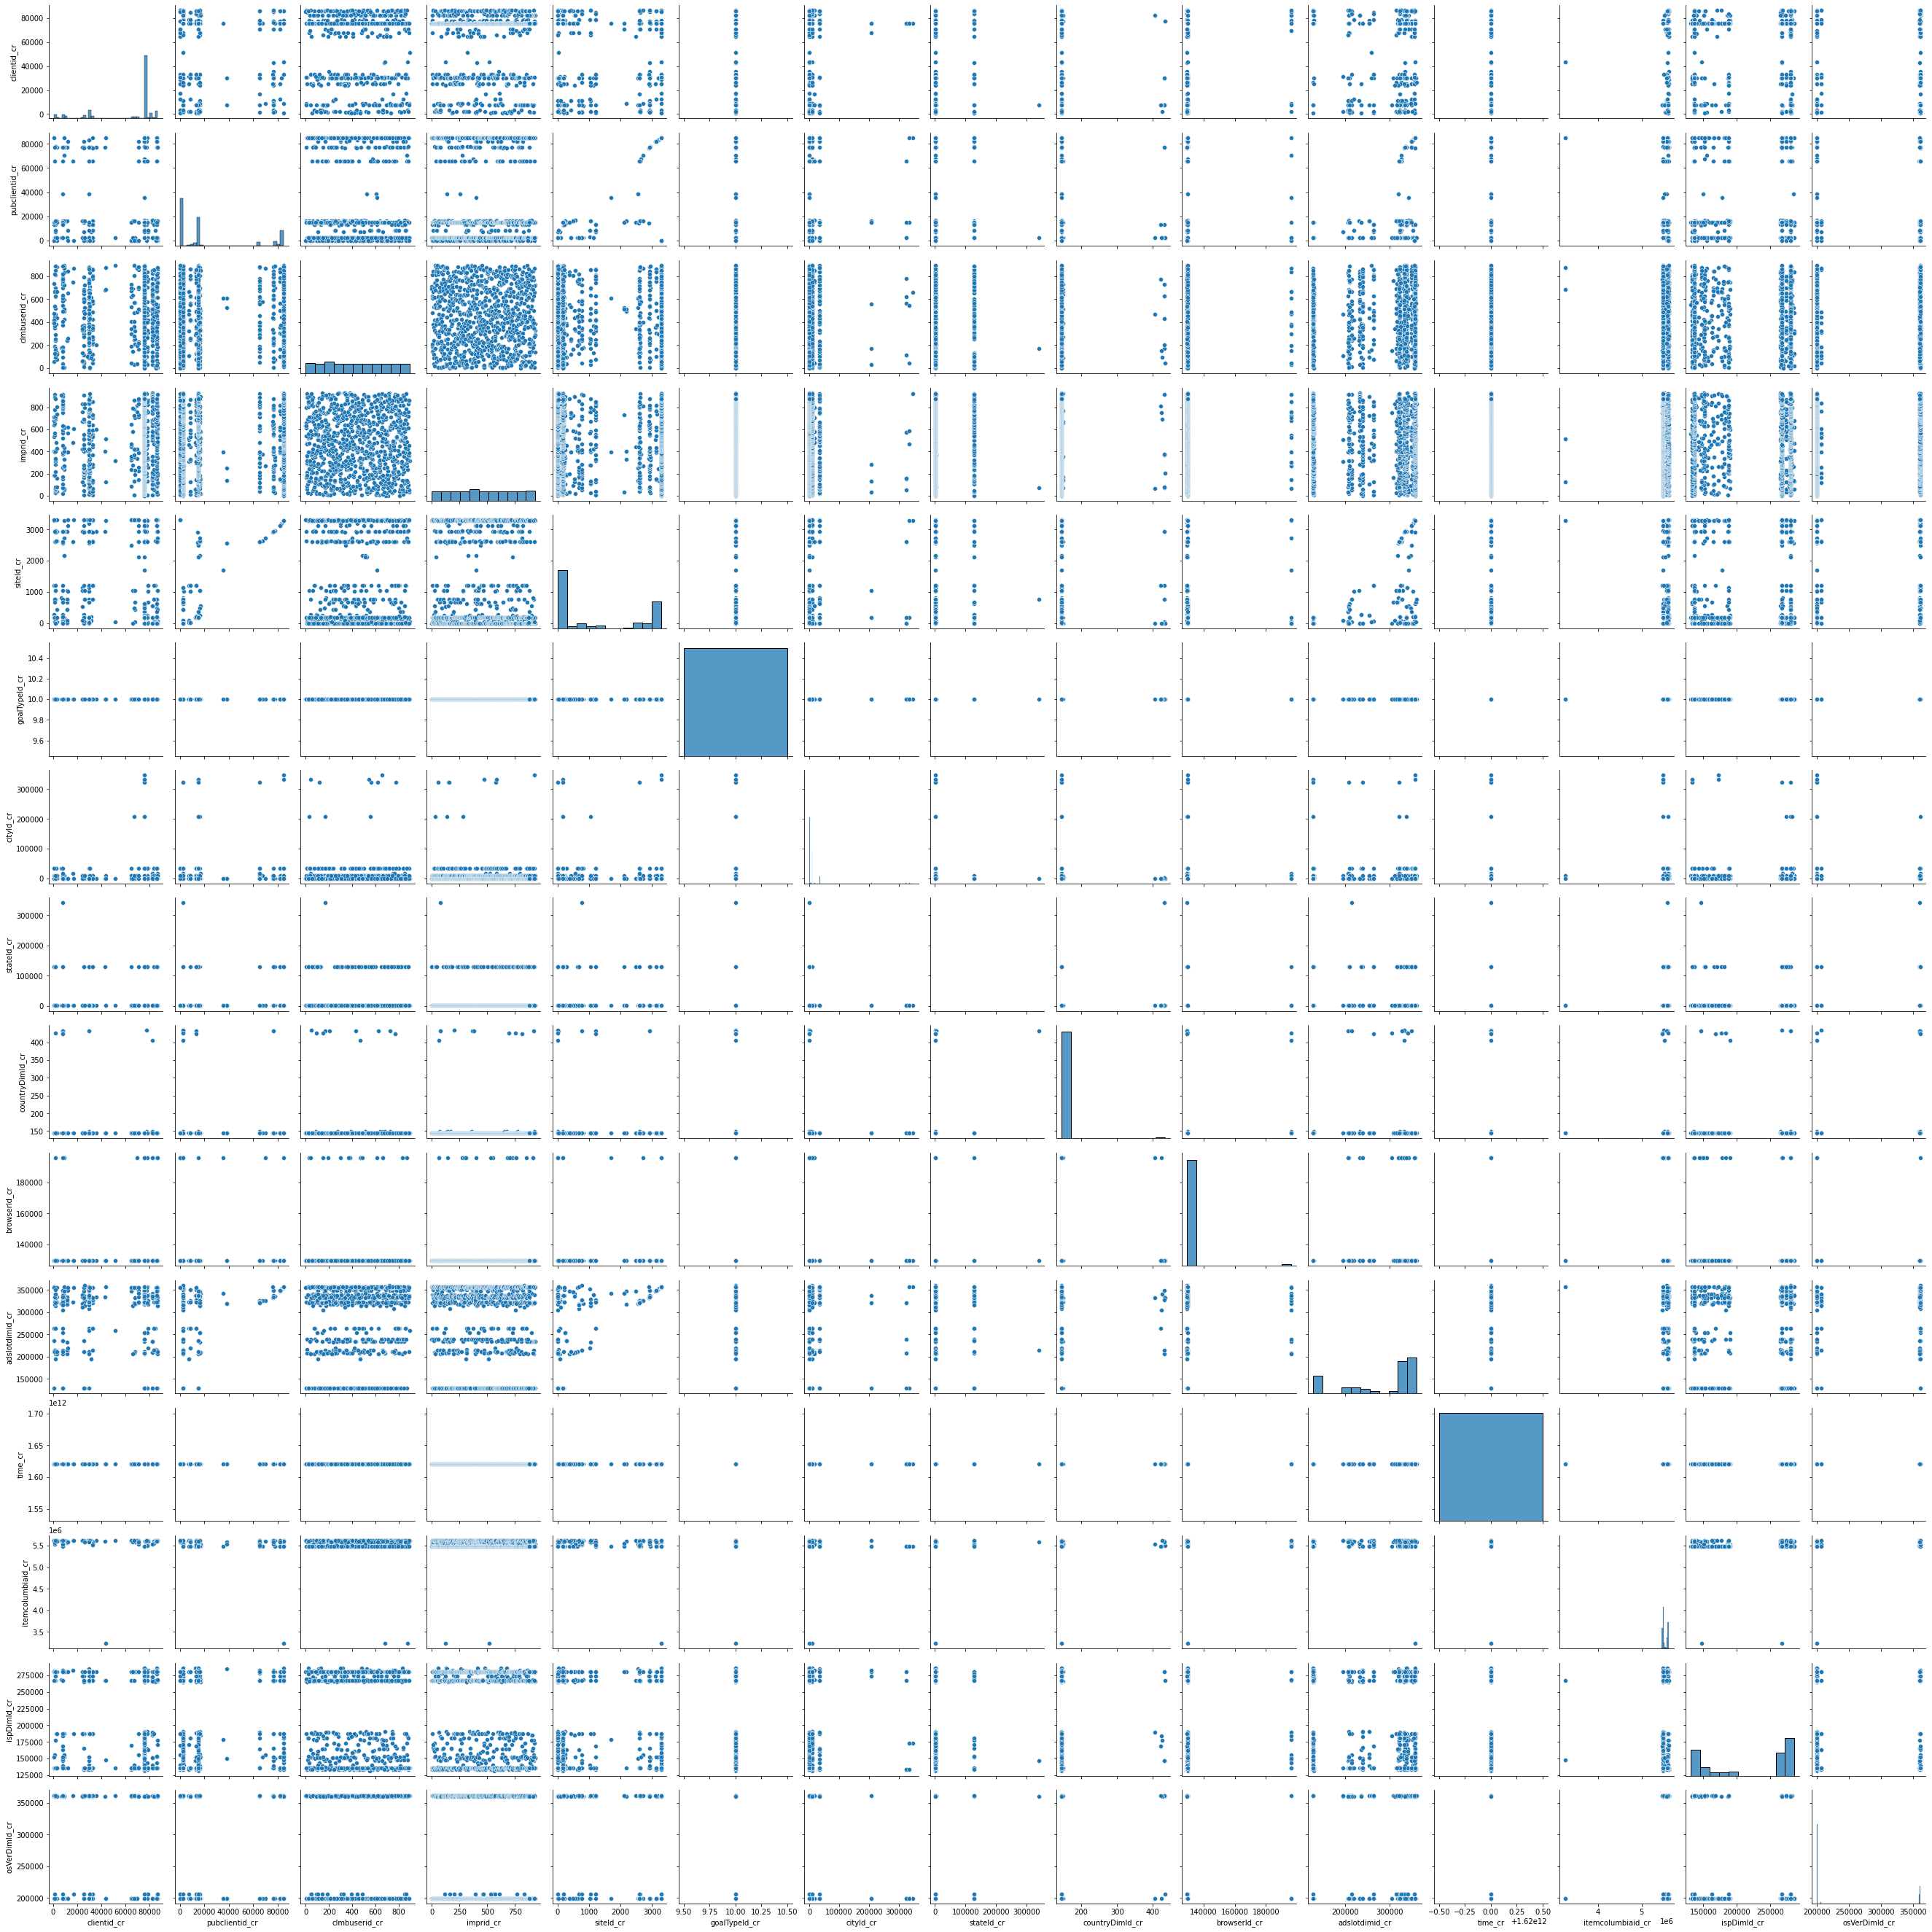

In [104]:
sns.pairplot(train_df1)

In [59]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.3,stratify=Y,random_state=50)
#x_train,x_test,y_train,y_test

#Model Making with different algorithms

# 1.Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=2)
tree_classifier.fit(x,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [62]:
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,y_predict)
#sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
#cm

In [63]:
#Accuracy Score
#from sklearn.metrics import accuracy_score
#tac1=accuracy_score(y_train, tree_classifier.predict(x_train))
#acs=accuracy_score(y_test,y_predict)
#print("train_Accuracy",tac1*100)
#print("test_Accuracy",acs*100)

# 2.Random Forest Ensembler

In [64]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(max_depth=5, random_state=2)
randomforest_model.fit(x, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [65]:

#y_predict=randomforest_model.predict(x_test)
#y_predict


In [66]:
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,y_predict)
#sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
#cm

In [67]:
#Accuracy Score
#from sklearn.metrics import accuracy_score
#tac2=accuracy_score(y_train, randomforest_model.predict(x_train))
#acs1=accuracy_score(y_test,y_predict)
#print('train_accuracy',tac2)
#print("test_Accuracy",acs1)

#3.Voting Classifier

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
estimators = []
model1 = RandomForestClassifier(max_depth=5, random_state=2)
estimators.append(('random', model1))
model2 = DecisionTreeClassifier(random_state=2)
estimators.append(('cart', model2))
model3 = SVC(random_state=2)
estimators.append(('svm', model3))
model4=KNeighborsClassifier(n_neighbors=3)
estimators.append(('knn',model4))

In [ ]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x,Y)
# results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
# results

VotingClassifier(estimators=[('random',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=5,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
       

#4.KNN Classifier

In [ ]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,Y)
    prediction_knn=knn.predict(test_df1)
    

#Reading Test Data from test data .csv file

In [68]:
test_df=pd.read_csv('/content/Test Data.csv')
test_df

,record_id,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,refurl_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,allAudiences_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,lookUpFrom_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,deviceId_cr,uvh_cr,uv_cr,platformId_cr,sdkVersion_cr,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,1620000000000,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,NaN,145,XXX.XXX.XXX.XXX,5526656,53184285,3,2658,https%3A%2F%2Ftimesofindia.indiatimes.com%2Fworld,3,2946.0,8628,1620000000000,1,1,"9nj,8qu",16,196061,0,0,2442,0,1,264494,265618,145,10,369206,1620000000000,NaN,0,1,348012,NaN,196047.0,NaN,42860785.0,1.0,NaN,NaN,NaN,3.337341e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,NaN,3.10,144,XXX.XXX.XXX.XXX,5488773,49504162,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy5,oy7,mgg,oy9,pus,lo4,p12,ps3,oos,p16,oou,o1...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,2298,1620000000000,1.620000e+12,199414,1,348011,348020.0,NaN,NaN,NaN,NaN,NaN,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,NaN,3.10,144,XXX.XXX.XXX.XXX,5488088,49504161,1,85030,https%3A%2F%2Fwww.olx.in%2F,3290,5167.0,6384,1620000000000,2,1,"oy7,mgg,oy9,lo4,p12,ps3,oos,p16,oou,o1v,p18,5o...",16,196063,129639,10278,1808,202038,2,264496,280429,144,10,5713,1620000000000,1.620000e+12,199414,1,348011,348020.0,NaN,NaN,NaN,NaN,NaN,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,NaN,3296,NaN,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,66670,1620000000000,1.620000e+12,360833,1,348011,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,NaN,144,XXX.XXX.XXX.XXX,5614054,53607445,1,1,NaN,3296,NaN,3370,1620000000000,2,1,"761,jyq,jtl,o28,q04,o1v,o1x,kxs,5vy,75y,nr2",17,129311,129408,10239,1801,0,2,264496,280429,144,10,53789,1620000000000,1.620000e+12,360833,1,348011,348025.0,NaN,NaN,NaN,NaN,NaN,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1450,75694,d7b5dfcb-b5ea-4862-8e47-5d775c568b00-6m6g,1620000000000,ff755b7d-00a4-426a-835c-ddf7f56af2b3-10o78,332783,20,"8kt,8j4,8k6,8kv,8j6,8k8,2vk,8gv,2vl,8gw,8iy,3s...",3.10,144,XXX.XXX.XXX.XXX,5488773,49504155,181581299,2658,https%3A%2F%2Ftimesofindia.indiatimes.com%2Fin...,3,4376.0,6384,1620000000000,2,1,"n90,n91,n98,nyw,n7x,n7z,qq3,qq5,apc,357,n8a,35...",16,196058,129639,0,1808,202038,2,264494,266906,144,10,4954,1620000000000,1.620000e+12,199452,1,348011,348020.0,NaN,NaN,NaN,NaN,NaN,3.334963e+17,NaN,3.337341e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,1451,75694,81b2e0f3-ba16-4f1d-ba54-cbb18ab54dca-1sjac,1620000000000,ff89a128-e0b9-4dcd-9a3f-257dff9e4dd5-10o78,129239,20,"8gq,8k6,8kv,8k8,2vk,8gv,2vl,8gw,2x6,2vv,30r,8g...",NaN,144,XXX.XXX.XXX.XXX,5488773,49504157,1,15240,

#Taking measures for test data

In [69]:
test_df1=pd.DataFrame(data=test_df,columns=['record_id','clientid_cr','pubclientid_cr','ip_cr','clmbuserid_cr','imprid_cr','siteId_cr','goalTypeId_cr','cityId_cr','stateId_cr','countryDimId_cr','browserId_cr','adslotdimid_cr','time_cr','itemcolumbiaid_cr','ispDimId_cr','deviceId_cr','osVerDimId_cr'])

In [70]:
test_df1

,record_id,clientid_cr,pubclientid_cr,ip_cr,clmbuserid_cr,imprid_cr,siteId_cr,goalTypeId_cr,cityId_cr,stateId_cr,countryDimId_cr,browserId_cr,adslotdimid_cr,time_cr,itemcolumbiaid_cr,ispDimId_cr,deviceId_cr,osVerDimId_cr
0,1000,82122,2658,XXX.XXX.XXX.XXX,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,3,10,0,2442,145,0,233531,1620000000000,5526656,265618,196047.0,0
1,1001,75694,85030,XXX.XXX.XXX.XXX,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,3290,10,10278,1808,144,129639,356952,1620000000000,5488773,280429,NaN,199414
2,1002,75694,85030,XXX.XXX.XXX.XXX,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,3290,10,10278,1808,144,129639,356952,1620000000000,5488088,280429,NaN,199414
3,1003,30431,1,XXX.XXX.XXX.XXX,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,3296,10,10239,1801,144,129408,355768,1620000000000,5614054,280429,NaN,360833
4,1004,30431,1,XXX.XXX.XXX.XXX,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,3296,10,10239,1801,144,129408,355768,1620000000000,5614054,280429,NaN,360833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1450,75694,2658,XXX.XXX.XXX.XXX,d7b5dfcb-b5ea-4862-8e47-5d775c568b00-6m6g,ff755b7d-00a4-426a-835c-ddf7f56af2b3-10o78,3,10,0,1808,144,129639,332783,1620000000000,5488773,266906,NaN,199452
451,1451,75694,15240,XXX.XXX.XXX.XXX,81b2e0f3-ba16-4f1d-ba54-cbb18ab54dca-1sjac,ff89a128-e0b9-4dcd-9a3f-257dff9e4dd5-10o78,178,10,438,1818,144,129639,129239,1620000000000,5488773,133765,196047.0,199522
452,1452,75694,15240,XXX.XXX.XXX.XXX,9453538d-3c8a-4e9b-aff3-85a37b722429-1sj4s,ff9b716c-4cd1-44a7-9c21-19f6a73f31a2-10nqk,178,10,10313,1817,144,129639,129237,1620000000000,5488773,147570,NaN,199452
453,1453,8895,76969,XXX.XXX.XXX.XXX,8399fad4-a7de-49ec-9e58-d18530086e7d,ffc803da-ac63-4bf3-88fa-bd1d70bcdc39-10ntc,2923,10,0,1803,144,129433,334760,1620000000000,5601460,273302,NaN,360833


In [71]:
test_df1.shape

(455, 18)

In [72]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_id          455 non-null    int64  
 1   clientid_cr        455 non-null    int64  
 2   pubclientid_cr     455 non-null    int64  
 3   ip_cr              455 non-null    object 
 4   clmbuserid_cr      455 non-null    object 
 5   imprid_cr          455 non-null    object 
 6   siteId_cr          455 non-null    int64  
 7   goalTypeId_cr      455 non-null    int64  
 8   cityId_cr          455 non-null    int64  
 9   stateId_cr         455 non-null    int64  
 10  countryDimId_cr    455 non-null    int64  
 11  browserId_cr       455 non-null    int64  
 12  adslotdimid_cr     455 non-null    int64  
 13  time_cr            455 non-null    int64  
 14  itemcolumbiaid_cr  455 non-null    int64  
 15  ispDimId_cr        455 non-null    int64  
 16  deviceId_cr        76 non-

In [73]:
test_df1=test_df1.drop(['deviceId_cr','ip_cr'],axis=1)

In [74]:
test_df1.shape

(455, 16)

In [75]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   record_id          455 non-null    int64 
 1   clientid_cr        455 non-null    int64 
 2   pubclientid_cr     455 non-null    int64 
 3   clmbuserid_cr      455 non-null    object
 4   imprid_cr          455 non-null    object
 5   siteId_cr          455 non-null    int64 
 6   goalTypeId_cr      455 non-null    int64 
 7   cityId_cr          455 non-null    int64 
 8   stateId_cr         455 non-null    int64 
 9   countryDimId_cr    455 non-null    int64 
 10  browserId_cr       455 non-null    int64 
 11  adslotdimid_cr     455 non-null    int64 
 12  time_cr            455 non-null    int64 
 13  itemcolumbiaid_cr  455 non-null    int64 
 14  ispDimId_cr        455 non-null    int64 
 15  osVerDimId_cr      455 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 57.0+ 

In [76]:
for i in test_df1.columns:
  if 0. in test_df1[i].unique():
    print(i)
  


cityId_cr
stateId_cr
browserId_cr
ispDimId_cr
osVerDimId_cr


In [77]:
test_df1['osVerDimId_cr'] = test_df1['osVerDimId_cr'].replace([0],199452.0)

In [78]:
test_df1['ispDimId_cr'] = test_df1['ispDimId_cr'].replace([0],280429.0)

In [79]:
test_df1['browserId_cr'] = test_df1['browserId_cr'].replace([0],129639.0)

In [80]:
test_df1['stateId_cr'] = test_df1['stateId_cr'].replace([0],1808.0)

In [81]:
test_df1['cityId_cr'] = test_df1['cityId_cr'].replace([0],435.0)

In [82]:
for i in test_df1.columns:
  if 0 in test_df1[i].unique():
    print(i)
  


In [83]:
test_df1['cityId_cr'].unique()

array([   435,  10278,  10239,  10240,  10286,    437,    439,    436,
        10300,  10302,    438,  10295,  10314,  10291,  34728,  34678,
        10313,  10269, 322893,  10263,    440,   4946,  10267,  10232,
        10233,  10310,  34714,  34676,  10262,  10276,  10309,  10308,
        34699,  10282,  34755,  16705,  10255,  34725,  34745,  34679,
       208121,  34727,  10251,  10317,  10257,  10289,   2942,  10254,
         4297, 208118,  34724, 322890,  10296,  34705,  34702,  10250,
        10284,  10290,  34685, 333484,  10292,  34708,  10261, 217302])

In [84]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   record_id          455 non-null    int64 
 1   clientid_cr        455 non-null    int64 
 2   pubclientid_cr     455 non-null    int64 
 3   clmbuserid_cr      455 non-null    object
 4   imprid_cr          455 non-null    object
 5   siteId_cr          455 non-null    int64 
 6   goalTypeId_cr      455 non-null    int64 
 7   cityId_cr          455 non-null    int64 
 8   stateId_cr         455 non-null    int64 
 9   countryDimId_cr    455 non-null    int64 
 10  browserId_cr       455 non-null    int64 
 11  adslotdimid_cr     455 non-null    int64 
 12  time_cr            455 non-null    int64 
 13  itemcolumbiaid_cr  455 non-null    int64 
 14  ispDimId_cr        455 non-null    int64 
 15  osVerDimId_cr      455 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 57.0+ 

In [85]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test_df1['clmbuserid_cr']= label_encoder.fit_transform(test_df1['clmbuserid_cr'])
  
test_df1['clmbuserid_cr'].unique()

array([ 28, 135, 158, 210, 284, 357,  52, 231, 417, 247, 373,   6, 102,
       120,  17, 413, 244, 383, 399, 265, 151, 319,  24, 230, 364, 272,
       107,  44, 420, 140, 193,  22, 302,  70, 172, 220, 122, 297, 190,
       276, 340,  31, 375,  35, 235, 327, 123, 404, 215, 163, 363, 435,
       350,  15, 278, 268,  45,  61, 270, 160, 408, 321, 174, 131, 274,
        89, 108, 275, 323, 225, 259, 287,  20, 338, 376, 403, 388,  48,
       188, 187,  91,  54,   7, 106, 241,  49, 298, 288, 211, 366, 295,
        81, 199,  83, 206,  37, 360, 239, 129, 303,  78,  76, 400, 119,
        69, 133,   5, 105, 113, 410, 258, 186, 332, 125, 356, 299, 242,
       132, 313, 294, 200, 351, 277,  12, 390,  56,  53, 396,  96, 197,
       115, 249, 182, 286, 144, 422, 318, 155, 292,  77,  73, 216, 317,
       402, 103,  10, 153, 380,  75,  84, 240, 358, 348, 251,  86,  63,
       434,  43, 398, 406, 347, 333, 229,  97,  99, 368, 219, 421,  88,
       180, 387, 296, 415, 293, 228, 315,  62, 310, 157, 345, 35

In [86]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test_df1['imprid_cr']= label_encoder.fit_transform(test_df1['imprid_cr'])
  
test_df1['imprid_cr'].unique()

array([ 40,  36, 141,  17,  22,  43, 345,  35,  33,  31,  30,   5,  29,
        28,  27,  26,  34, 153, 430,  10,  32,  37,  38,  39,  25,  24,
        23,  21,  19,  18,  16,  41,  15,  14,  13,  12,  11,  20,  42,
         9,   8,   7, 178, 237,   6,   4,   3,   2,   1,   0, 284, 441,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 17

In [87]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   record_id          455 non-null    int64
 1   clientid_cr        455 non-null    int64
 2   pubclientid_cr     455 non-null    int64
 3   clmbuserid_cr      455 non-null    int64
 4   imprid_cr          455 non-null    int64
 5   siteId_cr          455 non-null    int64
 6   goalTypeId_cr      455 non-null    int64
 7   cityId_cr          455 non-null    int64
 8   stateId_cr         455 non-null    int64
 9   countryDimId_cr    455 non-null    int64
 10  browserId_cr       455 non-null    int64
 11  adslotdimid_cr     455 non-null    int64
 12  time_cr            455 non-null    int64
 13  itemcolumbiaid_cr  455 non-null    int64
 14  ispDimId_cr        455 non-null    int64
 15  osVerDimId_cr      455 non-null    int64
dtypes: int64(16)
memory usage: 57.0 KB


In [88]:
test_df1=test_df1.drop(['record_id'],axis=1)

In [89]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   clientid_cr        455 non-null    int64
 1   pubclientid_cr     455 non-null    int64
 2   clmbuserid_cr      455 non-null    int64
 3   imprid_cr          455 non-null    int64
 4   siteId_cr          455 non-null    int64
 5   goalTypeId_cr      455 non-null    int64
 6   cityId_cr          455 non-null    int64
 7   stateId_cr         455 non-null    int64
 8   countryDimId_cr    455 non-null    int64
 9   browserId_cr       455 non-null    int64
 10  adslotdimid_cr     455 non-null    int64
 11  time_cr            455 non-null    int64
 12  itemcolumbiaid_cr  455 non-null    int64
 13  ispDimId_cr        455 non-null    int64
 14  osVerDimId_cr      455 non-null    int64
dtypes: int64(15)
memory usage: 53.4 KB


# Predicting using Decision Tree model

In [111]:
y_predict1=tree_classifier.predict(test_df1)
y_predict1


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [115]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(Y,tree_classifier.predict(x))

In [116]:
acc1*100

95.23316062176166

# Predicting using Voting model

In [112]:
y_predict=ensemble.predict(test_df1)
y_predict

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [118]:
from sklearn.metrics import accuracy_score
acc2=accuracy_score(Y,ensemble.predict(x))

In [119]:
acc2*100

94.71502590673575

# Predicting using KNN model

In [ ]:
prediction_knn

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False, False, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [120]:
from sklearn.metrics import accuracy_score
acc3=accuracy_score(Y,knn.predict(x))

In [121]:
acc3*100

87.87564766839378

# Predicting using Random Forest model

In [96]:
predict2=randomforest_model.predict(x)

In [98]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y, randomforest_model.predict(x))

In [99]:
acc*100

96.99481865284974

In [100]:
type(predict2)

numpy.ndarray

In [101]:
prediction=randomforest_model.predict(test_df1)
prediction

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

We can see that Random Forest Model gives better reults so we are uing it for getting results for test data

#Writing our results to csv file

In [108]:
lst = test_df['record_id']
  
# list of int
lst2 = list(prediction)
  
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['record_id', 'conversion_fraud'])

In [109]:
df.to_csv('result.csv',index=False)

#**After writing into csv file change True into False and False to True as our model predicts fraud as False and geniune as True.**
#**But in result we want fraud as True and Geniune as False**